# Жиделев Сергей 
# 7 лабораторная работа
# РИ-401002

In [115]:
import numpy as np
import numpy.random as rand
import matplotlib.pyplot as plt
import h5py
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout


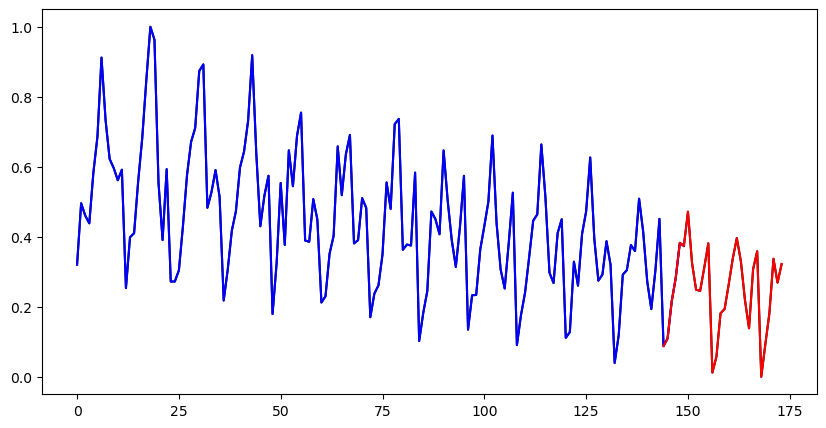

In [116]:
file = h5py.File('Data/Fort.mat', 'r')
data = file.get('Fort')
Fort = np.array(data)
F = np.ravel(Fort)
F = F.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
F = scaler.fit_transform(F)
F_tr = F[:150]
F_test = F[144:]
plt.figure(figsize = (10, 5))
plt.plot(F, 'k')
plt.plot(np.r_[:150],F_tr, 'b')
plt.plot(np.r_[144:174],F_test, 'r')
plt.show()

In [117]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
data_gen = TimeseriesGenerator(F_tr, F_tr,
 length=6, sampling_rate=1,
 batch_size=150)
batch_0 = data_gen[0]
x, y = batch_0 # вход и обучающий выход для сети
print(x.shape) # 144 точки обучения, прогноз 1 точки по 6 прошлым
xx=np.reshape(x, (x.shape[0], 1, x.shape[1]))
yy=y
print(xx.shape) # меняем местами размерности
print(yy.shape) #

(144, 6, 1)
(144, 1, 6)
(144, 1)


In [134]:
F_tr = F[:150]
F_test = F[125:]

10 задание

In [138]:
data_gen = TimeseriesGenerator(F_tr, F_tr,
 length=25, sampling_rate=1,
 batch_size=150)
batch_0 = data_gen[0]
x, y = batch_0 # вход и обучающий выход для сети
print(x.shape) # 144 точки обучения, прогноз 1 точки по 6 прошлым
xx=np.reshape(x, (x.shape[0], 1, x.shape[1]))
yy=y
print(xx.shape) # меняем местами размерности
print(yy.shape) #

m = 30

model = Sequential()
model.add(LSTM(units=m, return_sequences=True, input_shape=(1, 25)))
model.add(Dropout(0.15))
model.add(LSTM(units=m, return_sequences=True))
model.add(Dropout(0.15))
model.add(LSTM(units=m))
model.add(Dropout(0.15))
model.add(Dense(units = 2))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')



(125, 25, 1)
(125, 1, 25)
(125, 1)


In [139]:
model.fit(xx, yy, epochs = 200)

Epoch 1/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - loss: 0.1985
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1947 
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1823 
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1829 
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1533 
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1483 
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1196 
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0968 
Epoch 9/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0613 
Epoch 10/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0415 
Epoch 11/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0368 
Epoch 12/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0320 
Epoch 13/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0378 
Epoch 14/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0324 
Epoch 15/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0293 
Epoch 16/200
4/4 ━

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 233ms/step


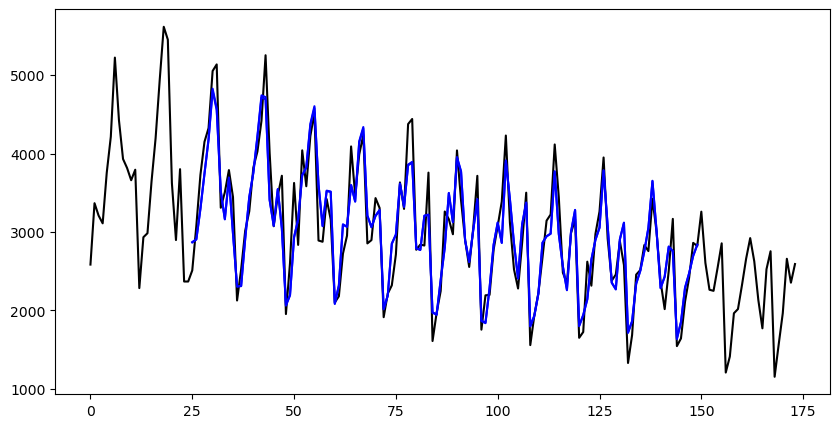

In [140]:
trainPredict = model.predict(xx)
trainPredict = scaler.inverse_transform(trainPredict)
plt.figure(figsize = (10, 5))
plt.plot(Fort, 'k')
plt.plot(np.r_[25:150], trainPredict, 'b')
plt.show()

In [141]:
data_gen = TimeseriesGenerator(F_test, F_test,
 length=25, sampling_rate=1,
 batch_size=150)
batch_0 = data_gen[0]
x, y = batch_0
xx=np.reshape(x, (x.shape[0], 1, x.shape[1]))
yy = y
print(xx.shape) # прогноз на 24 точки по 6 наблюдениям
print(yy.shape) 


(24, 1, 25)
(24, 1)


In [142]:
xx

array([[[0.47244624, 0.6265681 , 0.39493728, 0.27464158, 0.2921147 ,
         0.38732079, 0.31922043, 0.03942652, 0.11917563, 0.29189068,
         0.3046595 , 0.37634409, 0.35909498, 0.50873656, 0.41487455,
         0.27217742, 0.19332437, 0.3030914 , 0.45116487, 0.08758961,
         0.10954301, 0.21460573, 0.28248208, 0.38261649, 0.37365591]],

       [[0.6265681 , 0.39493728, 0.27464158, 0.2921147 , 0.38732079,
         0.31922043, 0.03942652, 0.11917563, 0.29189068, 0.3046595 ,
         0.37634409, 0.35909498, 0.50873656, 0.41487455, 0.27217742,
         0.19332437, 0.3030914 , 0.45116487, 0.08758961, 0.10954301,
         0.21460573, 0.28248208, 0.38261649, 0.37365591, 0.47177419]],

       [[0.39493728, 0.27464158, 0.2921147 , 0.38732079, 0.31922043,
         0.03942652, 0.11917563, 0.29189068, 0.3046595 , 0.37634409,
         0.35909498, 0.50873656, 0.41487455, 0.27217742, 0.19332437,
         0.3030914 , 0.45116487, 0.08758961, 0.10954301, 0.21460573,
         0.28248208, 0.38261

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


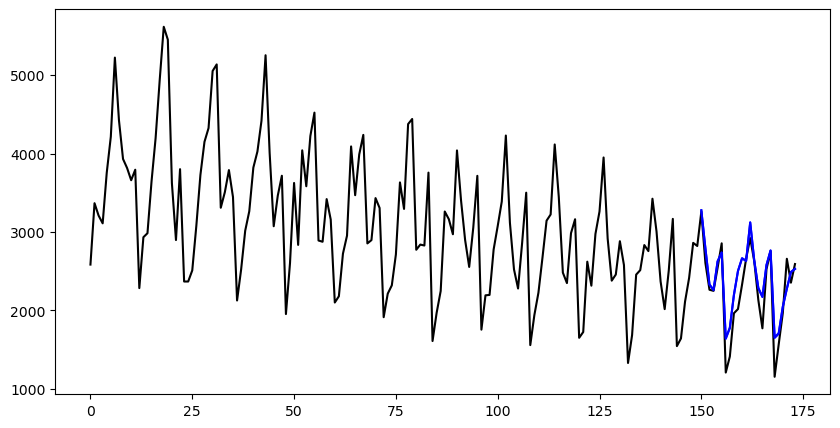

In [149]:
testPredict = model.predict(xx)
testPredict = scaler.inverse_transform(testPredict)
plt.figure(figsize = (10, 5))
plt.plot(Fort, 'k')
plt.plot(np.r_[150:174],testPredict, 'b')
plt.show()

In [150]:
testPredict.shape

(24, 2)

11 задание

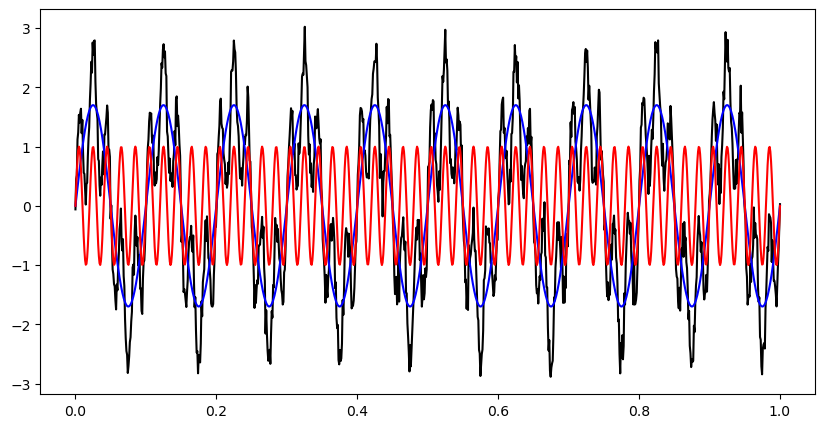

In [152]:
t = np.linspace(0, 1, 1024)
f1 = 10
f2 = 50
F=1.7*np.sin(2*np.pi*f1*t)+np.sin(2*np.pi*f2*t)+0.2*rand.randn(len(t))
plt.figure(figsize = (10, 5))
plt.plot(t, F, 'k')
plt.plot(t, 1.7*np.sin(2*np.pi*f1*t), 'b')
plt.plot(t, np.sin(2*np.pi*f2*t), 'r')
plt.show()


In [180]:
F_tr, F_test = F[:len(F)-236].reshape(-1, 1), F[len(F)-306:].reshape(-1, 1)

data_gen = TimeseriesGenerator(F_tr, F_tr,
 length=50, sampling_rate=1,
 batch_size=len(F_tr))

batch_0 = data_gen[0]
x, y = batch_0 # вход и обучающий выход для сети
print(x.shape) # 144 точки обучения, прогноз 1 точки по 6 прошлым
xx=np.reshape(x, (x.shape[0], 1, x.shape[1]))
yy=y
print(xx.shape) # меняем местами размерности
print(yy.shape) #

m = 100

model = Sequential()
model.add(LSTM(units=m, return_sequences=True, input_shape=(1, 50)))
model.add(Dropout(0.3))
model.add(LSTM(units=m, return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units=m))
model.add(Dropout(0.4))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

(738, 50, 1)
(738, 1, 50)
(738, 1)


In [181]:
model.fit(xx, yy, epochs = 200)

Epoch 1/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 1.6784
Epoch 2/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4712
Epoch 3/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1350
Epoch 4/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1052
Epoch 5/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1101
Epoch 6/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0879
Epoch 7/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0900
Epoch 8/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0799
Epoch 9/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0902
Epoch 10/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0840
Epoch 11/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0838
Epoch 12/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0896
Epoch 13/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0821
Epoch 14/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0758
Epoch 15/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0739
Epoc

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step


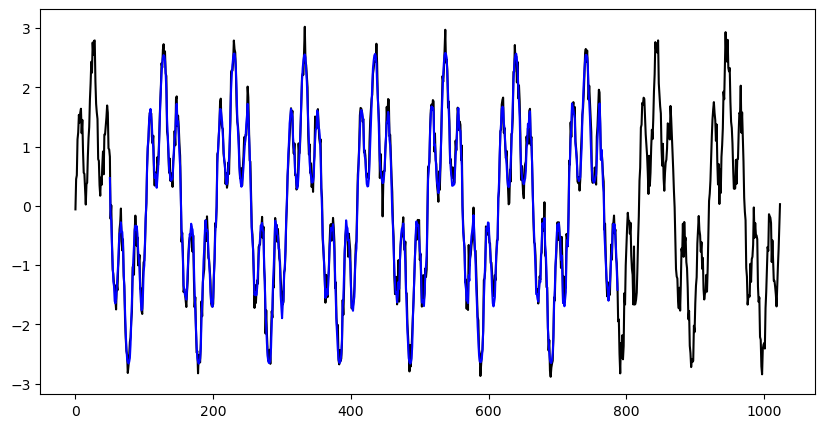

In [182]:
trainPredict = model.predict(xx)
plt.figure(figsize = (10, 5))
plt.plot(F, 'k')
plt.plot(np.r_[50:788], trainPredict, 'b')
plt.show()

In [183]:
data_gen = TimeseriesGenerator(F_test, F_test,
 length=50, sampling_rate=1,
 batch_size=len(F))
batch_0 = data_gen[0]
x, y = batch_0
xx=np.reshape(x, (x.shape[0], 1, x.shape[1]))
yy = y
print(xx.shape) # прогноз на 24 точки по 6 наблюдениям
print(yy.shape) 

(256, 1, 50)
(256, 1)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


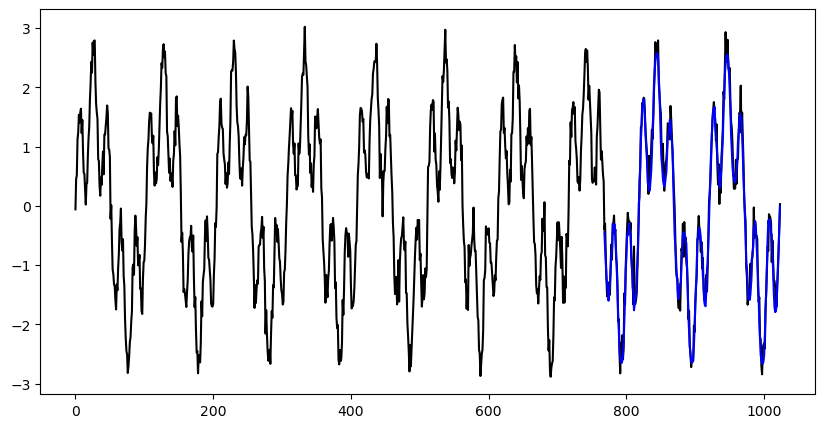

In [184]:
testPredict = model.predict(xx)
plt.figure(figsize = (10, 5))
plt.plot(F, 'k')
plt.plot(np.r_[768:1024], testPredict, 'b')
plt.show()

12 задание

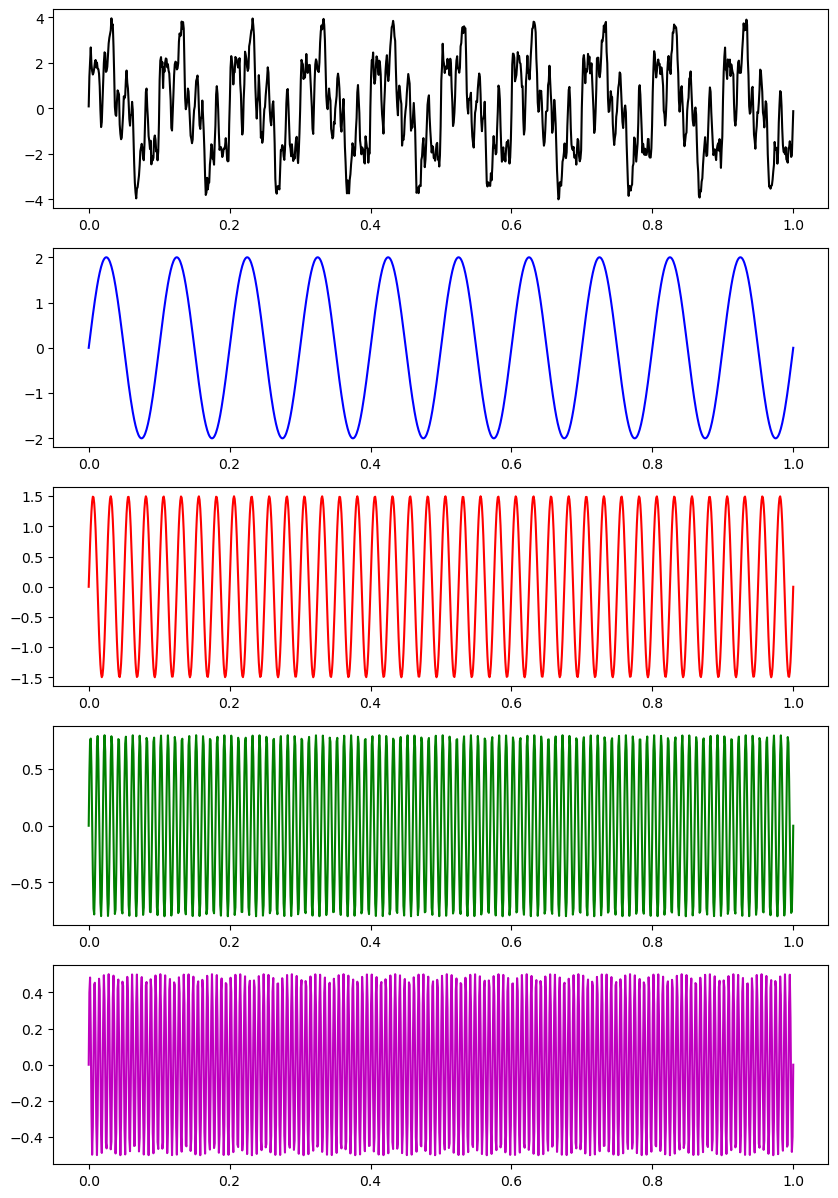

In [185]:
t = np.linspace(0,1,1024)
f1 = 10
f2 = 40
f3 = 100
f4 = 150
F=2.0*np.sin(2*np.pi*f1*t)+1.5*np.sin(2*np.pi*f2*t)+0.8*np.sin(2*np.pi*f3
*t)+0.5*np.sin(2*np.pi*f4*t)+0.2*rand.randn(len(t))
plt.figure(figsize = (10, 15))
plt.subplot(5,1,1)
plt.plot(t, F, 'k')
plt.subplot(5,1,2)
plt.plot(t, 2.0*np.sin(2*np.pi*f1*t), 'b')
plt.subplot(5,1,3)
plt.plot(t, 1.5*np.sin(2*np.pi*f2*t), 'r')
plt.subplot(5,1,4)
plt.plot(t, 0.8*np.sin(2*np.pi*f3*t), 'g')
plt.subplot(5,1,5)
plt.plot(t, 0.5*np.sin(2*np.pi*f4*t), 'm')
plt.show()

In [186]:
F=2.0*np.sin(2*np.pi*f1*t)+1.5*np.sin(2*np.pi*f2*t)+0.8*np.sin(2*np.pi*f3
*t)+0.5*np.sin(2*np.pi*f4*t)

In [197]:
F_tr, F_test = F[:len(F)-206].reshape(-1, 1), F[len(F)-336:].reshape(-1, 1)

data_gen = TimeseriesGenerator(F_tr, F_tr,
 length=80, sampling_rate=1,
 batch_size=len(F_tr))

batch_0 = data_gen[0]
x, y = batch_0 # вход и обучающий выход для сети
print(x.shape) # 144 точки обучения, прогноз 1 точки по 6 прошлым
xx=np.reshape(x, (x.shape[0], 1, x.shape[1]))
yy=y
print(xx.shape) # меняем местами размерности
print(yy.shape) #

m = 100

model = Sequential()
model.add(LSTM(units=m, return_sequences=True, input_shape=(1, 80)))
model.add(Dropout(0.3))
model.add(LSTM(units=m, return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units=m))
model.add(Dropout(0.4))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

(738, 80, 1)
(738, 1, 80)
(738, 1)


In [202]:
F_tr.shape

(818, 1)

In [203]:
F_test.shape

(336, 1)

In [198]:
model.fit(xx, yy, epochs = 200)

Epoch 1/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - loss: 3.2579
Epoch 2/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.0889
Epoch 3/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2356
Epoch 4/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1238
Epoch 5/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1120
Epoch 6/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1130
Epoch 7/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1021
Epoch 8/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0991
Epoch 9/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0866
Epoch 10/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0940
Epoch 11/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0944
Epoch 12/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0915
Epoch 13/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0767
Epoch 14/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0914
Epoch 15/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0678
Ep

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step


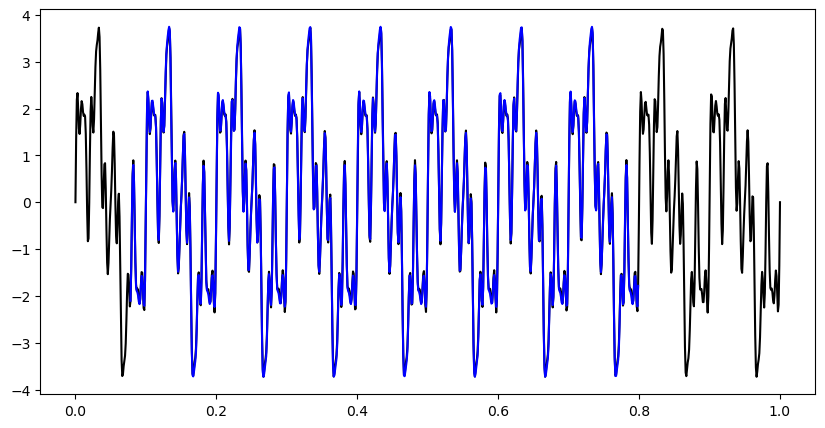

In [199]:
trainPredict = model.predict(xx)
plt.figure(figsize = (10, 5))
plt.plot(t[:1024], F[:1024], 'k')
plt.plot(t[80:818], trainPredict, 'b')
plt.show()

In [200]:
data_gen = TimeseriesGenerator(F_test, F_test,
 length=80, sampling_rate=1,
 batch_size=len(F))
batch_0 = data_gen[0]
x, y = batch_0
xx=np.reshape(x, (x.shape[0], 1, x.shape[1]))
yy = y
print(xx.shape) # прогноз на 24 точки по 6 наблюдениям
print(yy.shape) 

(256, 1, 80)
(256, 1)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


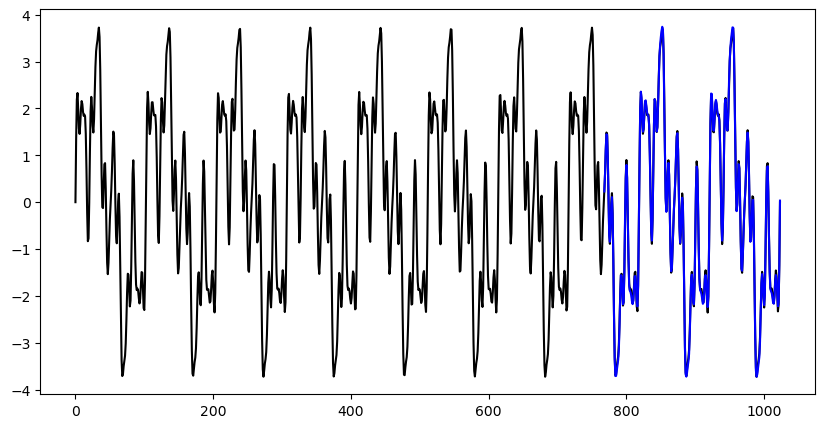

In [201]:
testPredict = model.predict(xx)
plt.figure(figsize = (10, 5))
plt.plot(F, 'k')
plt.plot(np.r_[768:1024], testPredict, 'b')
plt.show()